# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [101]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [102]:
#Cargamos dataset a utilizar
df_car = pd.read_csv("/content/car_evaluation.csv", header = None)


## Análisis exploratorio de datos

In [103]:
#Visualizacion del dataframe
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [104]:
#Analizamos el shape del objeto
print(df_car.shape)

(1728, 7)


In [105]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
columns_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df_car.columns = columns_names

In [106]:
#Vericamos la transformacion
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [107]:
#Visualizamos los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [108]:
# Exploremos un poco mas la variable target
df_car["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [109]:
#Verificamos valores missings
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [110]:
#Separamos en X e y
X = df_car.drop("class", axis = 1)
# X = df_car[["persons", "safety"]]
y = df_car["class"]

In [111]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [112]:
#Veamos que obtuvimos
X_train.shape , X_test.shape

((1209, 6), (519, 6))

In [113]:
y_train.shape, y_test.shape

((1209,), (519,))

In [114]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [115]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [116]:
!pip install category-encoders

In [117]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ["buying",	"maint",	"doors",	"persons",	"lug_boot",	"safety"])
# encoder = ce.OrdinalEncoder(cols = ["persons", "safety"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [118]:
#Verificamos la transformacion
X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [119]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [120]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [121]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [122]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [123]:
y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

## Evaluación de modelo de clasificación con árbol de decisión

In [124]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("The accuracy train is:",train_accuracy_tree)
print("The accuracy train is:",test_accuracy_tree)

The accuracy train is: 0.7733664185277088
The accuracy train is: 0.7591522157996147


Text(0.5, 1.0, 'The importance feature')

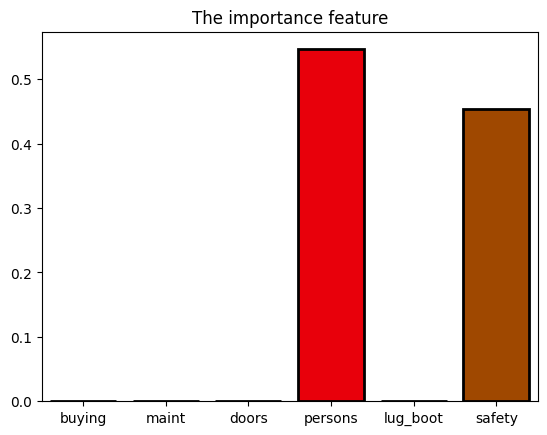

In [125]:
#Verificamos el feature importances
importances = tree.feature_importances_
columns = X.columns

sns.barplot( x = columns, y = importances, palette = "bright", saturation = 2.0, edgecolor = "black", linewidth = 2)
plt.title("The importance feature")

In [126]:
from io import StringIO
from IPython.display import Image, display
from sklearn import tree as tr
import pydotplus

out = StringIO()
tr.export_graphviz(tree, out_file = out, feature_names=list(X.columns))

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('cars.png')

True

## Entrenamiento de modelo de clasificación con random forest

In [127]:
list(y_train.unique())

['vgood', 'unacc', 'acc', 'good']

In [167]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 11, random_state = 0, criterion = "log_loss")
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=11, random_state=0)

In [168]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [169]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("The accuracy train is:", train_accuracy_rf)
print("The accuracy test is:", test_accuracy_rf)
#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

The accuracy train is: 0.9975186104218362
The accuracy test is: 0.8863198458574181


In [135]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)
features_scores

safety      0.265097
buying      0.226618
persons     0.208910
maint       0.109985
lug_boot    0.098011
doors       0.091380
dtype: float64

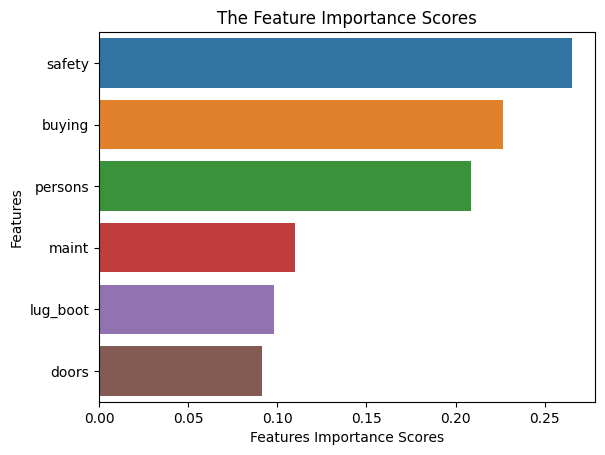

In [140]:
#Grafico de barras
sns.barplot(x = features_scores, y = features_scores.index)
plt.title("The Feature Importance Scores")
plt.xlabel("Features Importance Scores")
plt.ylabel("Features")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

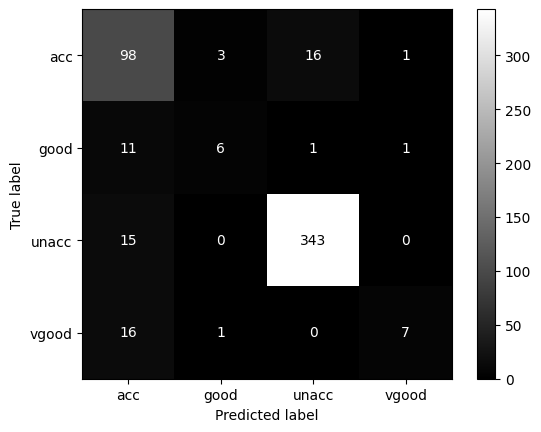

In [148]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_test_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.unique(y_test))

disp.plot(cmap="gray", values_format = "d")
plt.show


In [150]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.70      0.83      0.76       118
        good       0.60      0.32      0.41        19
       unacc       0.95      0.96      0.96       358
       vgood       0.78      0.29      0.42        24

    accuracy                           0.87       519
   macro avg       0.76      0.60      0.64       519
weighted avg       0.87      0.87      0.87       519



In [151]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [155]:
# Importa la clase GridSearchCV de sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Crea una instancia del clasificador RandomForestClassifier
rf = RandomForestClassifier()

# Define un diccionario de parámetros que se probarán en la búsqueda de cuadrícula
parametros = {
  'n_estimators' : range(4,15),  # Prueba diferentes valores para el número de estimadores
  'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],  # Prueba diferentes criterios de división
}

# Crea una instancia de GridSearchCV para buscar los mejores hiperparámetros
# Utiliza validación cruzada con 5 particiones y la métrica de puntuación 'accuracy'
rf_grid = GridSearchCV(rf, parametros, cv=5, scoring='accuracy').fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados por la búsqueda de cuadrícula
print(rf_grid.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 275.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [156]:
rf_grid.best_params_

{'criterion': 'log_loss', 'n_estimators': 11}

In [157]:
rf_grid.best_estimator_

RandomForestClassifier(criterion='log_loss', n_estimators=11)